## Les missions du projet: 

- Statistique descriptive (M1 et M2)
- génération de jeu de données (M3) 
- modelisation :  ANOVA , multi-linear regression (M4) 

*dans ce notebook c'est M1 et M2

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [4]:
data = pd.read_csv("data-projet7.csv")
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB
None


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [5]:
data['income'] = data['income'].str.replace(',','.')
data['gdpppp'] = data['gdpppp'].str.replace(',','.')
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297
1,ALB,2008,2,100,916.66235,7297
2,ALB,2008,3,100,1010.916,7297
3,ALB,2008,4,100,1086.9078,7297
4,ALB,2008,5,100,1132.6997,7297


In [6]:
data['income'] = data['income'].astype(float)
data['gdpppp'] = data['gdpppp'].astype(float)
#data.to_csv('WIDdata2008.csv')
data.head()

#ici les quantiles en 100 ctd basé sur la totalité de data income de toute la population , on a découpé en 100 morceaux 


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


- A quantile is missing in this dataframe. 
- in column gdpppp, there're 200 null values compared with other columns

In [7]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

In [8]:
data['country'].unique().shape

(116,)

In [9]:
data.groupby('country').count()

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
ALB,100,100,100,100,100
ARG,100,100,100,100,100
ARM,100,100,100,100,100
AUT,100,100,100,100,100
AZE,100,100,100,100,100
BEL,100,100,100,100,100
BFA,100,100,100,100,100
BGD,100,100,100,100,100
BGR,100,100,100,100,100


on constate des anomalies ci-après: 
- country **LTU** a seulement 99 individus pour chaque colonne; 
- **XKX, PSE** ont leur 0 nombre de valeur pour colonne gdpppp, alors que les autres pays ont tous 100 non-null valeur pour chaque colonne, cela explique les 200 valeurs null dans gdpppp

In [10]:
data.groupby('quantile').count()

,country,year_survey,nb_quantiles,income,gdpppp
quantile,,,,,
1,116,116,116,116,114
2,116,116,116,116,114
3,116,116,116,116,114
4,116,116,116,116,114
5,116,116,116,116,114
6,116,116,116,116,114
7,116,116,116,116,114
8,116,116,116,116,114
9,116,116,116,116,114


- **quantile 41** n'a que 115 pays correspondant, ctd. 1 pays client n'a pas de data sur son quantile 41. 

- En prenant en compte LTU qui a une observation manquée, on arrive à conclure que cette observation de LTU est celle sur son quantile 41. 

In [11]:
# ici on va imputer une valeur (la moyenne de 40 et 42 quantile LTU)

LTU41 = data.loc[(data['quantile'].isin([40,42]))&(data['country']=='LTU')]
LTU41


,country,year_survey,quantile,nb_quantiles,income,gdpppp
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0


In [12]:
# append the row of quantile 41 for LTU onto the data 

data = data.append(
    {'country' : 'LTU' , 
     'year_survey' : 2008,
     'quantile': 41,
     'nb_quantiles': 100,
     'income': LTU41['income'].mean(),
     'gdpppp': 17571.0,
    } , ignore_index=True)

data[data['country']=='LTU']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6200,LTU,2008,1,100,566.34530,17571.0
6201,LTU,2008,2,100,1147.05870,17571.0
6202,LTU,2008,3,100,1490.84080,17571.0
6203,LTU,2008,4,100,1746.57150,17571.0
6204,LTU,2008,5,100,1842.95420,17571.0
6205,LTU,2008,6,100,1925.86410,17571.0
6206,LTU,2008,7,100,2048.38570,17571.0
6207,LTU,2008,8,100,2173.71120,17571.0
6208,LTU,2008,9,100,2302.08570,17571.0
6209,LTU,2008,10,100,2361.64800,17571.0


In [115]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11400 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [13]:
# show the 200 rows with null gdpppp 
lack200= data.loc[data['gdpppp'].isnull(),:]
lack200

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
5805,XKX,2008,6,100,763.90980,NaN
5806,XKX,2008,7,100,803.13160,NaN
5807,XKX,2008,8,100,838.51465,NaN
5808,XKX,2008,9,100,874.04150,NaN
5809,XKX,2008,10,100,904.00990,NaN


In [14]:
lack200.groupby('country').mean('income')

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
PSE,2009.0,50.5,100.0,1114.098514,NaN
XKX,2008.0,50.5,100.0,2176.269035,NaN


In [15]:
# XKX 2008 GDPPPP
11426000000/2130000

5364.319248826291

In [16]:
data.loc[(data['country']=='XKX'),'gdpppp']=5364.32

In [17]:
# PSE 2009 GDPPPP = 5250 
data.loc[(data['country']=='PSE'),'gdpppp']=5250

In [18]:
data[data['country']=='PSE'].head()
# data.loc[(data['country']=='PSE'),:].head()     #rendu pareil 

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11199,PSE,2009,1,100,195.28990,5250.0
11200,PSE,2009,2,100,264.36533,5250.0
11201,PSE,2009,3,100,301.44672,5250.0
11202,PSE,2009,4,100,329.83392,5250.0
11203,PSE,2009,5,100,348.76495,5250.0


In [19]:
data.info()             

# now that null values are processed. is data dataframe good for manipulation ? 
# not yet, need to verify if there're outliers in columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [20]:
data.describe()
# max for gdpppp is extremely far away from 75% 3rd quantile , similar case for income 

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11600.000000,11600.000000,11600.0,11600.000000,1.160000e+04
mean,2007.982759,50.500000,100.0,6069.121925,4.944408e+04
std,0.909593,28.867314,0.0,9413.786596,3.966304e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.750000,100.0,900.768507,2.577500e+03
50%,2008.000000,50.500000,100.0,2403.492950,7.532500e+03
75%,2008.000000,75.250000,100.0,7515.313700,1.819625e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


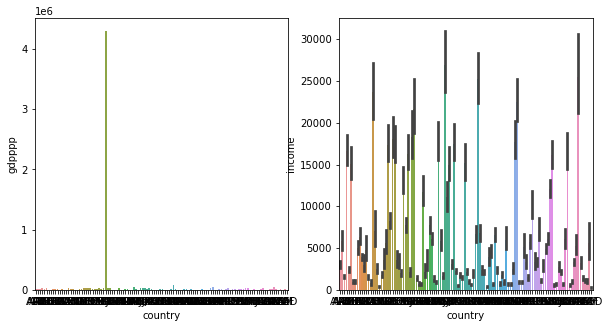

In [21]:
# to illustrate abnormal values in gdpppp and income
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
ax= sns.barplot(x= 'country',y= 'gdpppp', data= data)
plt.subplot(1,2,2)
ax1 = sns.barplot(x= 'country',y= 'income', data= data)
plt.show()

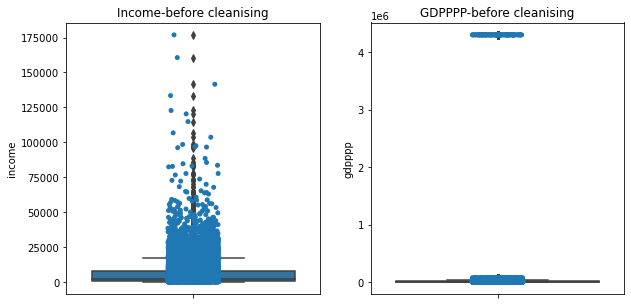

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = sns.boxplot( y="income",  data=data)
ax1 = sns.stripplot( y="income", data=data)
plt.title('Income-before cleanising')

plt.subplot(1,2,2)
ax2  = sns.boxplot( y="gdpppp", data=data)
ax2  = sns.stripplot( y="gdpppp",  data=data)
plt.title('GDPPPP-before cleanising')
plt.show()
plt.savefig('M1_boxplot_dataWID_beforecleanising.png')

Selon ces graphiques, le gdpppp d'un pays est anormalement beaucoup supérieur que les autres => c'est un aberrant , à le repérer et nettoyer.

In [23]:
# repérer le pays duquel la valeur gdpppp est aberrante

data[data['gdpppp']== max(data['gdpppp'])].country.unique()

array(['FJI'], dtype=object)

In [24]:
data[data['country']=='FJI']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,4300332.0
3201,FJI,2008,2,100,384.33230,4300332.0
3202,FJI,2008,3,100,436.59265,4300332.0
3203,FJI,2008,4,100,486.81436,4300332.0
3204,FJI,2008,5,100,520.19720,4300332.0
3205,FJI,2008,6,100,556.57300,4300332.0
3206,FJI,2008,7,100,579.09064,4300332.0
3207,FJI,2008,8,100,598.60050,4300332.0
3208,FJI,2008,9,100,624.10980,4300332.0
3209,FJI,2008,10,100,646.52160,4300332.0


Selon ce qu'on a trouvé sur internet, Fiji n'est pas un pays aussi developpé à niveau qu'on pourrait observer son gdpppp aussi élevé. Probablement 4300332 devrait être 4300, qui est plus proche de la réalité et son niveau de revenu. Donc on le remplace par 4300.

In [25]:
data.loc[(data['country']=='FJI'),'gdpppp']= 4300
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11600.000000,11600.000000,11600.0,11600.000000,11600.000000
mean,2007.982759,50.500000,100.0,6069.121925,12409.323437
std,0.909593,28.867314,0.0,9413.786596,13108.901817
min,2004.000000,1.000000,100.0,16.719418,303.193050
25%,2008.000000,25.750000,100.0,900.768507,2577.500000
50%,2008.000000,50.500000,100.0,2403.492950,7488.500000
75%,2008.000000,75.250000,100.0,7515.313700,17679.250000
max,2011.000000,100.000000,100.0,176928.550000,73127.000000


In [97]:
# les observations du pays FJI sont enlevées 

#data.drop(data[data['country']=='FJI'].index, inplace=True)
#data.describe()

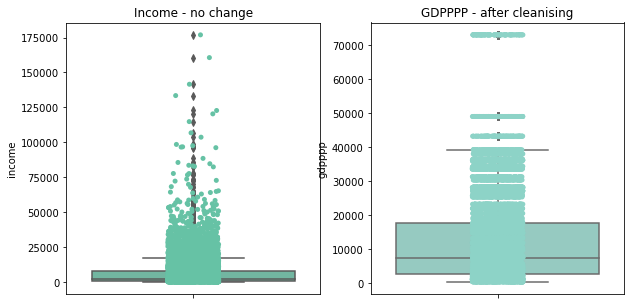

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = sns.boxplot( y="income",  data=data, palette="Set2")
ax1 = sns.stripplot( y="income", data=data, palette="Set2")
plt.title('Income - no change')

plt.subplot(1,2,2)
ax2  = sns.boxplot( y="gdpppp", data=data, palette="Set3")
ax2  = sns.stripplot( y="gdpppp",  data=data, palette="Set3")
plt.title('GDPPPP - after cleanising')
plt.show()
plt.savefig('M1_boxplot_dataWID_aftercleanising.png')

In [235]:
countries = data.groupby(by= 'country').mean('income').sort_values('income')

countries.reset_index(inplace= True)
print(countries.info())
countries

#ici le income représente income.mean(100 quantiles) par pays , sois revenu moyen du pays 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       116 non-null    object 
 1   year_survey   116 non-null    float64
 2   quantile      116 non-null    float64
 3   nb_quantiles  116 non-null    float64
 4   income        116 non-null    float64
 5   gdpppp        116 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.6+ KB
None


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,COD,2008.0,50.5,100.0,276.016044,303.193050
1,MDG,2010.0,50.5,100.0,345.237074,950.000000
2,CIV,2008.0,50.5,100.0,399.835204,1526.000000
3,KEN,2007.0,50.5,100.0,519.320032,1429.000000
4,SWZ,2009.0,50.5,100.0,530.283828,4748.000000
5,TZA,2007.0,50.5,100.0,588.766986,1201.000000
6,LBR,2007.0,50.5,100.0,615.007297,372.000000
7,NER,2007.0,50.5,100.0,650.129353,631.000000
8,MLI,2010.0,50.5,100.0,681.075039,929.529660
9,SYR,2004.0,50.5,100.0,685.817495,4512.000000


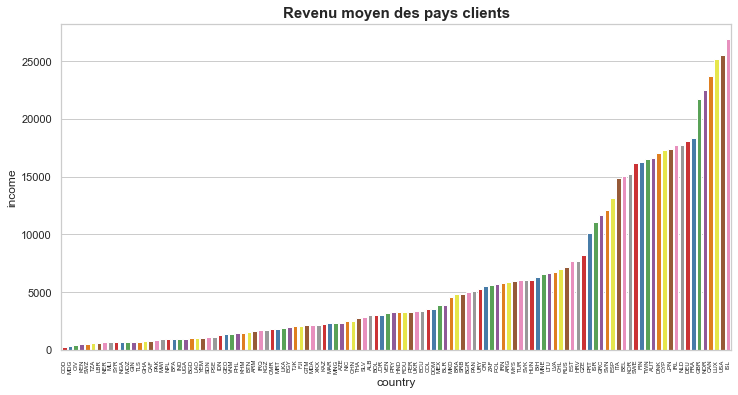

<Figure size 432x288 with 0 Axes>

In [236]:
sns.set(style='whitegrid')
plt.figure(figsize= (12,6))
ax= sns.barplot(x= 'country',y= 'income', data= countries, palette='Set1')

plt.title('Revenu moyen des pays clients', fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize= 6)
plt.show()
plt.savefig('M1_barplot_income_afterclean.png')

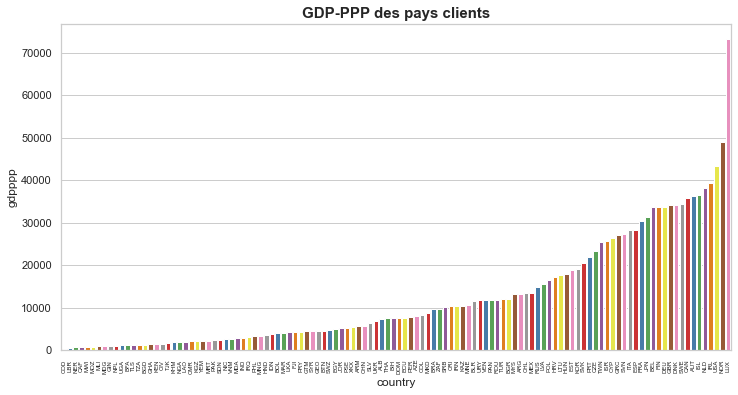

<Figure size 432x288 with 0 Axes>

In [237]:
data2 = data.sort_values('gdpppp')          #sort values by gdpppp 
plt.figure(figsize= (12,6))
ax= sns.barplot(x= 'country',y= 'gdpppp', data= data2, palette= 'Set1')
plt.title('GDP-PPP des pays clients',  fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize= 6)
plt.show()
plt.savefig('M1_barplot_gdpppp_afterclean.png')

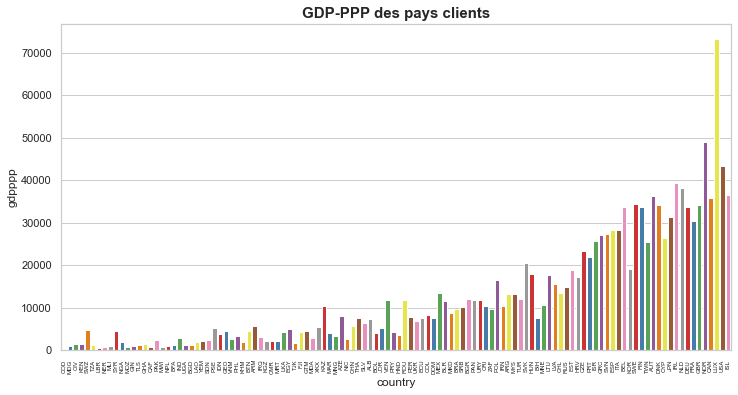

<Figure size 432x288 with 0 Axes>

In [30]:
#countries2 = countries.sort_values('gdpppp')          #sort values by gdpppp 

plt.figure(figsize= (12,6))
ax= sns.barplot(x= 'country',y= 'gdpppp', data= countries, palette= 'Set1')    # ici the order of countries is sorted by income
plt.title('GDP-PPP des pays clients',  fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize= 6)
plt.show()
plt.savefig('M1_barplot_gdpppp_afterclean.png',dpi=100)

In [31]:
# export data vers csv pour l'usage ultérieur 
data.to_csv('data_cleaned_WID.csv')

In [32]:
Worldbank = pd.read_csv("worldbankdata5.csv")            # .dropna(how= "any", axis=0)
Worldbank= Worldbank.drop(columns= ["Series Code"])
print(Worldbank.info())
Worldbank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   800 non-null    object
 1   Country Code   798 non-null    object
 2   Series Name    798 non-null    object
 3   2008 [YR2008]  798 non-null    object
dtypes: object(4)
memory usage: 25.2+ KB
None


,Country Name,Country Code,Series Name,2008 [YR2008]
0,Afghanistan,AFG,GDP (constant 2015 US$),11060389403.7128
1,Afghanistan,AFG,GDP per capita (constant 2015 US$),415.086995378652
2,Afghanistan,AFG,"Population, total",27722281
3,Albania,ALB,GDP (constant 2015 US$),9721650518.69391
4,Albania,ALB,GDP per capita (constant 2015 US$),3298.60560217562


#### to clean 2008 [YR2008] column: 
'.' on front or on tail => '.' is more likely to be the decimal signal rather than the seperator for every thousand  => remove the part after the delimiter '.' 

In [33]:
Worldbank['2008'] = Worldbank['2008 [YR2008]'].str.split('.').str[0]
Worldbank.head()

,Country Name,Country Code,Series Name,2008 [YR2008],2008
0,Afghanistan,AFG,GDP (constant 2015 US$),11060389403.7128,11060389403
1,Afghanistan,AFG,GDP per capita (constant 2015 US$),415.086995378652,415
2,Afghanistan,AFG,"Population, total",27722281,27722281
3,Albania,ALB,GDP (constant 2015 US$),9721650518.69391,9721650518
4,Albania,ALB,GDP per capita (constant 2015 US$),3298.60560217562,3298


In [34]:
Worldbank.tail(200)

,Country Name,Country Code,Series Name,2008 [YR2008],2008
603,Tuvalu,TUV,GDP (constant 2015 US$),31923357.8188767,31923357
604,Tuvalu,TUV,GDP per capita (constant 2015 US$),3094.84806775344,3094
605,Tuvalu,TUV,"Population, total",10315,10315
606,Uganda,UGA,GDP (constant 2015 US$),22066817291.4067,22066817291
607,Uganda,UGA,GDP per capita (constant 2015 US$),722.011586820781,722
608,Uganda,UGA,"Population, total",30431734,30431734
609,Ukraine,UKR,GDP (constant 2015 US$),120217307398.322,120217307398
610,Ukraine,UKR,GDP per capita (constant 2015 US$),3322.00512728069,3322
611,Ukraine,UKR,"Population, total",46258189,46258189
612,United Arab Emirates,ARE,GDP (constant 2015 US$),288932794417.685,288932794417


We observe that: 
- row 798- 802 have no sense, to be removed
- the 651-797 rows is subtotal for preceeding rows, to be removed

In [35]:
Worldbank  = Worldbank.drop(Worldbank.index[651:802], axis=0)
Worldbank['2008'] = pd.to_numeric(Worldbank['2008'])         #convert ['2008'] data to numeric 
Worldbank.info()
Worldbank.tail(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 802
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   652 non-null    object 
 1   Country Code   651 non-null    object 
 2   Series Name    651 non-null    object 
 3   2008 [YR2008]  651 non-null    object 
 4   2008           621 non-null    float64
dtypes: float64(1), object(4)
memory usage: 30.6+ KB


,Country Name,Country Code,Series Name,2008 [YR2008],2008
552,St. Vincent and the Grenadines,VCT,GDP (constant 2015 US$),757175251.215559,7.571753e+08
553,St. Vincent and the Grenadines,VCT,GDP per capita (constant 2015 US$),6984.98753753832,6.984000e+03
554,St. Vincent and the Grenadines,VCT,"Population, total",108401,1.084010e+05
555,Sudan,SDN,GDP (constant 2015 US$),58638439292.8844,5.863844e+10
556,Sudan,SDN,GDP per capita (constant 2015 US$),1469.96954374558,1.469000e+03
557,Sudan,SDN,"Population, total",33060844,3.306084e+07
558,Suriname,SUR,GDP (constant 2015 US$),4367284016.7413,4.367284e+09
559,Suriname,SUR,GDP per capita (constant 2015 US$),8445.36496154896,8.445000e+03
560,Suriname,SUR,"Population, total",517122,5.171220e+05
561,Sweden,SWE,GDP (constant 2015 US$),447559127029.566,4.475591e+11


By this step, the dataframe is cleaned and in right type for analysis

In [36]:
pop2008 = Worldbank[Worldbank["Series Name"] == "Population, total"]['2008'].sum()
pop2008

6734006152.0

In [37]:
pop= Worldbank[Worldbank["Series Name"] == "Population, total"][['Country Code', '2008']]
pop['2008'] = pop['2008'].astype(int)
pop.info()
pop.head()
#653-797 rows are subtotal data which includes already data by country 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2 to 650
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  217 non-null    object
 1   2008          217 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


,Country Code,2008
2,AFG,27722281
5,ALB,2947314
8,DZA,34730604
11,ASM,57490
14,AND,83860


In [238]:
dfmerged = pd.merge(countries[['country', 'income', 'gdpppp']], pop[['Country Code','2008']], 
                    left_on='country', right_on = 'Country Code') 
dfmerged.drop('Country Code', axis=1)
dfmerged.dropna(how= 'all', axis=1)
print(dfmerged.info())
dfmerged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       115 non-null    object 
 1   income        115 non-null    float64
 2   gdpppp        115 non-null    float64
 3   Country Code  115 non-null    object 
 4   2008          115 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 5.4+ KB
None


,country,income,gdpppp,Country Code,2008
0,COD,276.016044,303.19305,COD,60411195
1,MDG,345.237074,950.00000,MDG,19996476
2,CIV,399.835204,1526.00000,CIV,19605568
3,KEN,519.320032,1429.00000,KEN,39791984
4,SWZ,530.283828,4748.00000,SWZ,1049948


In [39]:
print("les années des données utilisées sont:", data['year_survey'].unique())
print("Le nombre de pays couverts par cette banque:", dfmerged.shape[0])
print("la population totale des pays où habitent les clients actuels est:", dfmerged['2008'].sum())
print('Ces pays clientèles occupent % de la population mondiale en 2008: ', str(round(dfmerged['2008'].sum()/pop2008,4)*100),'%'  )

les années des données utilisées sont: [2008 2009 2010 2007 2006 2011 2004]
Le nombre de pays couverts par cette banque: 115
la population totale des pays où habitent les clients actuels est: 6180824944
Ces pays clientèles occupent % de la population mondiale en 2008:  91.79 %


### Mission 1

Les données de la World Income Distribution présentent pour chaque pays les **quantiles de la distribution des revenus** de leur population respective.

- De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?   *centile, pourcentile*
- Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ? 

*oui et non. ça dépend du nombre de quantiles et l'approche employée pour le clivage, autrement dit on découpe la population en combien de morceaux et comment on définit les méthodes ou criteria de la découpe. 
Litérallement dit, le plus le nombre de quantiles pour une population, le plus on est précis et les échantillons sont représentatifs*
 

## Mission 2
- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le **revenu moyen (axe des ordonnées, sur une échelle logarithmique-log) de chacune - 100 - des classes de revenus (axe des abscisses)** pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas. [x axis: 100 quantiles; y axis: log_income pour 10 countries) 

- Représentez la **courbe de Lorenz** de chacun des pays choisis.      
- Pour chacun de ces 10 pays, représentez **l'évolution de l'indice de Gini** *au fil des ans*.
- **Classez ces pays clientèle par indice de Gini** de l'année 2008. Donnez la **moyenne**, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?


In [181]:
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [184]:
countries= countries.sort_values('income')     # revenu moyen
countries.head()
# to be used in this mission 
#countries.income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,COD,2008.0,50.5,100.0,276.016044,303.19305
1,MDG,2010.0,50.5,100.0,345.237074,950.00000
2,CIV,2008.0,50.5,100.0,399.835204,1526.00000
3,KEN,2007.0,50.5,100.0,519.320032,1429.00000
4,SWZ,2009.0,50.5,100.0,530.283828,4748.00000


In [185]:
# Option 1: sort by income (as demanded)
pays10= countries.iloc[[i for i in range(4,116,12)]]
pays10['country'].values

# 10 countries (sorted by income, ctd. revenu moyen) 

array(['SWZ', 'PAK', 'GEO', 'TJK', 'SLV', 'DOM', 'IRN', 'EST', 'FIN',
       'CAN'], dtype=object)

In [186]:
# Way2 for option 1: clustering automatic by K-means
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [187]:
# choix du nombre de composantes à calculer
n_comp = 2

X = countries[['income','gdpppp']].values
names = countries['country']        # ou data.index pour avoir les intitulés  
#features = countries['income'].columns      # = variables 

In [188]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=2)

In [189]:
names

0      COD
1      MDG
2      CIV
3      KEN
4      SWZ
5      TZA
6      LBR
7      NER
8      MLI
9      SYR
10     NGA
11     MOZ
12     GIN
13     TLS
14     GHA
15     CAF
16     PAK
17     MWI
18     NPL
19     BFA
20     IND
21     UGA
22     BGD
23     LAO
24     YEM
25     SDN
26     PSE
27     IDN
28     GEO
29     VNM
30     PHL
31     KHM
32     BTN
33     ARM
34     IRQ
35     KGZ
36     CMR
37     MRT
38     LKA
39     EGY
40     TJK
41     FJI
42     GTM
43     MDA
44     XKX
45     KAZ
46     MAR
47     MNG
48     AZE
49     NIC
50     CHN
51     THA
52     SLV
53     ALB
54     BOL
55     JOR
56     VEN
57     PRY
58     HND
59     ROU
60     PER
61     UKR
62     ECU
63     COL
64     DOM
65     MEX
66     BLR
67     MKD
68     BRA
69     SRB
70     BGR
71     PAN
72     URY
73     CRI
74     ZAF
75     POL
76     IRN
77     ARG
78     MYS
79     TUR
80     SVK
81     HUN
82     BIH
83     MNE
84     LTU
85     LVA
86     CHL
87     RUS
88     EST
89     HRV
90     CZE

In [190]:
# Nombre de clusters souhaités
n_clust = 10

# préparation des données pour le clustering
X = countries[['income','gdpppp']].values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
#X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)     # centrage
X_scaled = std_scale.transform(X)                 # reduction


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=n_comp).fit(X_scaled)
X_projected = pca.transform(X_scaled)   
X_projected

array([[-1.27068995e+00, -3.53989970e-02],
       [-1.22841890e+00, -7.88826488e-03],
       [-1.19152646e+00,  1.73619620e-02],
       [-1.18401980e+00, -6.09690175e-04],
       [-1.00381310e+00,  1.77259151e-01],
       [-1.18891462e+00, -2.03130086e-02],
       [-1.23083594e+00, -6.78296659e-02],
       [-1.21312000e+00, -5.76029742e-02],
       [-1.19371699e+00, -4.47986492e-02],
       [-9.99961131e-01,  1.47945951e-01],
       [-1.13773587e+00,  8.88373337e-03],
       [-1.20094469e+00, -5.44583936e-02],
       [-1.18956374e+00, -4.38304834e-02],
       [-1.17885139e+00, -3.98560000e-02],
       [-1.16349057e+00, -2.64126147e-02],
       [-1.19302349e+00, -7.18736100e-02],
       [-1.09585665e+00,  8.97239055e-03],
       [-1.17968225e+00, -8.04881762e-02],
       [-1.16244096e+00, -6.32738107e-02],
       [-1.16004743e+00, -6.16396057e-02],
       [-1.06710470e+00,  2.99561577e-02],
       [-1.15366249e+00, -7.00219434e-02],
       [-1.14348328e+00, -6.22919771e-02],
       [-1.

In [191]:
def display_facto(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
     for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    #plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                    plt.scatter(X_projected[:,0],  X_projected[:,1], c=clusters.astype(float),cmap= 'viridis', alpha=0.5)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) *1.1
            plt.xlim((-2,6))
            plt.ylim((-2,2))

            # définition des limites du graphique
            #plt.plot.xlim((0,10))
            #plt.plot.ylim((0, 10))
        
            # affichage des lignes horizontales et verticales
            plt.plot([-2,6], [0, 0], color='grey', ls='--')   #x-axis
            plt.plot([0, 0], [-2, 2], color='grey', ls='--')   #y-axis

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=True)


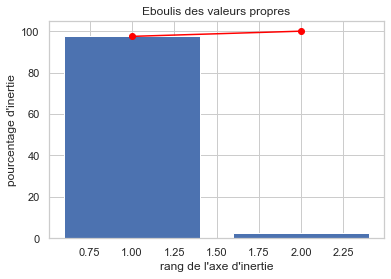

<Figure size 432x288 with 0 Axes>

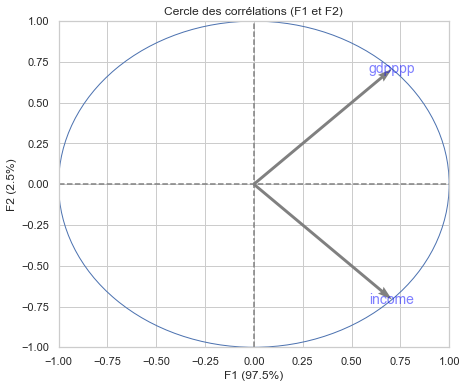

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

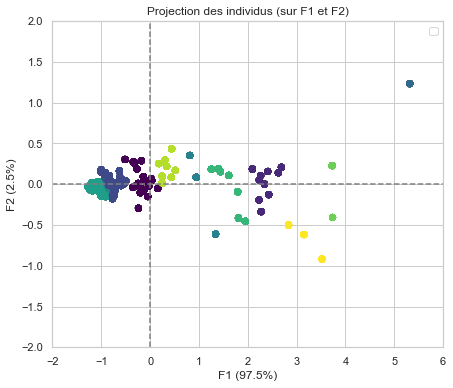

<Figure size 432x288 with 0 Axes>

In [192]:
#from functions66 import *
# Eboulis des valeurs propres
display_scree_plot(pca)
plt.savefig('P7M2_screeplot_eboulis.png')

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (2,3)], labels = np.array(features))
plt.savefig('P7M2_cercle correlation.png')

# projection des individus sur 1er plan factoriel
X_projected = pca.transform(X_scaled) 
display_facto(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var=np.array(names))    
plt.savefig('P7M2_Projection individus.png')

In [233]:
# Way3: classfication by dendrogram 
from functions66 import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing


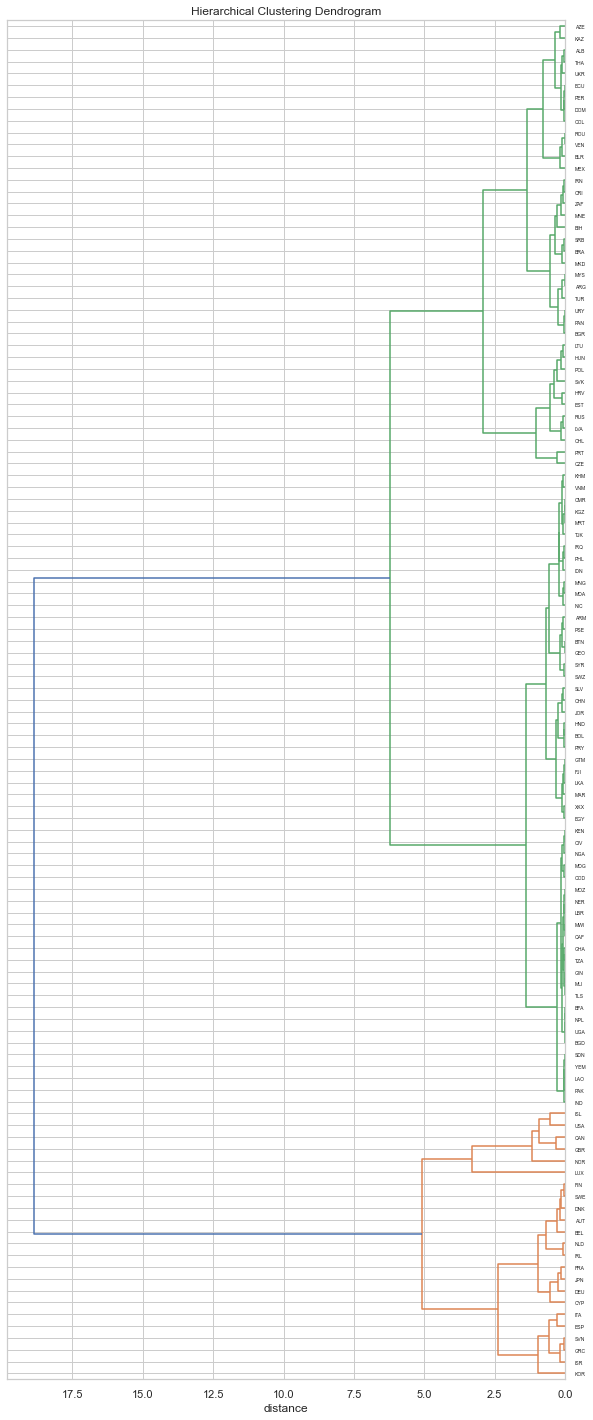

<Figure size 432x288 with 0 Axes>

In [239]:
pays= dfmerged[['country','income','gdpppp']].set_index('country')
countries = pays.index
variables = pays.columns
X = pays.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#X_scaled

# Clustering hiérarchique, méthode Ward
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, countries)

plt.savefig('clustering dendrogram.png')

In [251]:
# Coupage du dendrogramme en 10 clusters
clusters = fcluster(Z, 10, criterion='maxclust')
#clusters = fcluster(Z, 5, criterion='distance')                

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
countrygroupes = pd.DataFrame({"cluster": clusters, "title": countries}).sort_values("cluster")
#countrygroupes.reset_index('cluster')
#countrygroupes= countrygroupes[['cluster','title']].groupby('cluster').count()
countrygroupes

,cluster,title
92,1,ISR
93,1,GRC
94,1,SVN
95,1,ESP
98,1,KOR
96,1,ITA
102,2,DNK
99,2,SWE
100,2,FIN
101,2,AUT


In [252]:
# Option 2: sort by gdpppp

countries_sorted2= countries.sort_values('gdpppp')
countries_sorted2.head()
pays10_2= countries_sorted2.iloc[[i for i in range(4,116,12)]]
pays10_2['country'].values

AttributeError: 'tuple' object has no attribute 'head'

In [187]:
# create dataframe based on data for only these 10 countries (Option1_sorted by income)

data10 = data[data['country'].isin(pays10['country'].values)]
print(data10.info())
print(data10.describe())
print('10 countries:', data10['country'].unique())
data10.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1500 to 10198
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1000 non-null   object 
 1   year_survey   1000 non-null   int64  
 2   quantile      1000 non-null   int64  
 3   nb_quantiles  1000 non-null   int64  
 4   income        1000 non-null   float64
 5   gdpppp        1000 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 54.7+ KB
None
       year_survey     quantile  nb_quantiles         income        gdpppp
count    1000.0000  1000.000000        1000.0    1000.000000   1000.000000
mean     2008.2000    50.500000         100.0    6484.604996  12587.500000
std         0.4002    28.880514           0.0   10159.431927  12020.090017
min      2008.0000     1.000000         100.0      35.930096   1761.000000
25%      2008.0000    25.750000         100.0     939.097643   4516.000000
50%      2008.0000    50.500

,country,year_survey,quantile,nb_quantiles,income,gdpppp
1500,CAN,2008,1,100,122.42481,35895.0
1501,CAN,2008,2,100,1692.51420,35895.0
1502,CAN,2008,3,100,2715.05370,35895.0
1503,CAN,2008,4,100,3541.33810,35895.0
1504,CAN,2008,5,100,4237.81540,35895.0


In [189]:
data10_log= data10.groupby(by=["country"]).mean()[["income"]].reset_index().sort_values('income')
data10_log['log_income_mean'] = np.log(data10_log['income'])
data10_log

,country,income,log_income_mean
8,SWZ,530.283828,6.273412
6,PAK,887.839279,6.788791
4,GEO,1363.758606,7.218000
9,TJK,2069.852224,7.635232
7,SLV,2855.224809,7.956906
1,DOM,3558.402105,8.177067
5,IRN,5832.655501,8.671228
2,EST,7702.062593,8.949243
3,FIN,16306.330495,9.699309
0,CAN,23739.640518,10.074902


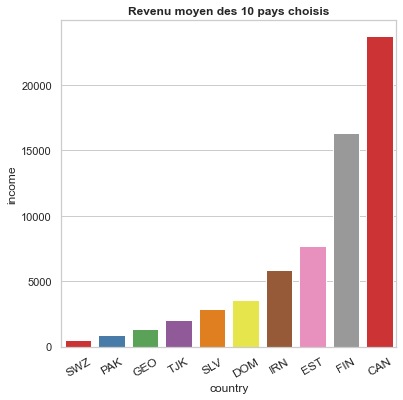

<Figure size 432x288 with 0 Axes>

In [190]:

plt.figure(figsize= (6,6))
ax= sns.barplot(x= 'country',y= 'income', data= data10_log, palette= 'Set1')
plt.title('Revenu moyen des 10 pays choisis', fontsize=12, fontweight='bold')
plt.xticks(rotation=30, fontsize= 12)
plt.show()
plt.savefig('M2_barplot_10income_afterclean.png')

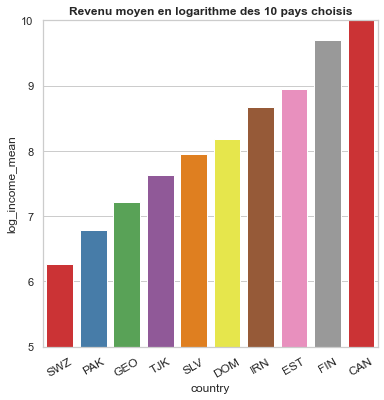

<Figure size 432x288 with 0 Axes>

In [191]:
plt.figure(figsize= (6,6))
ax= sns.barplot(x= 'country',y= 'log_income_mean', data= data10_log, palette= 'Set1')
plt.title('Revenu moyen en logarithme des 10 pays choisis', fontsize=12, fontweight='bold')
plt.xticks(rotation=30, fontsize= 12)
plt.ylim(5,10)
plt.show()
plt.savefig('M2_barplot_10 log income_afterclean.jpg')

  country   gdpppp
0     TJK   1761.0
1     PAK   2335.0
2     GEO   4516.0
3     SWZ   4748.0
4     SLV   6270.0
5     DOM   7505.0
6     IRN  10446.0
7     EST  18773.0
8     FIN  33626.0
9     CAN  35895.0


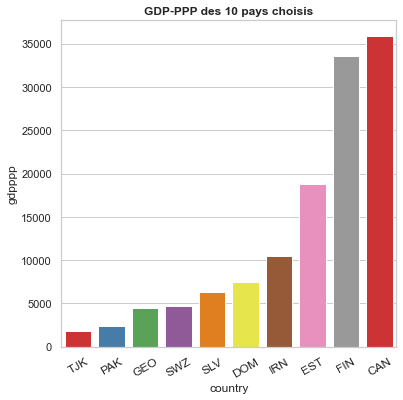

<Figure size 432x288 with 0 Axes>

In [192]:
gdpppp10= data10[['country','gdpppp']].groupby(['country']).mean('gdpppp').sort_values('gdpppp')
gdpppp10=gdpppp10.reset_index()
print(gdpppp10)

plt.figure(figsize= (6,6))
ax= sns.barplot(x= 'country',y= 'gdpppp', data= gdpppp10, palette= 'Set1')
plt.title('GDP-PPP des 10 pays choisis', fontsize=12, fontweight='bold')
plt.xticks(rotation=30, fontsize= 12)
plt.show()
plt.savefig('10 countries by gdpppp.png')
# option1 

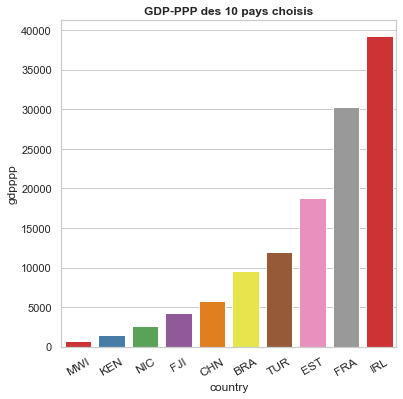

<Figure size 432x288 with 0 Axes>

In [196]:
#option 2: quand on selectionne pays par gdpppp
plt.figure(figsize= (6,6))
ax= sns.barplot(x= 'country',y= 'gdpppp', data= pays10_2, palette= 'Set1')
plt.title('GDP-PPP des 10 pays choisis', fontsize=12, fontweight='bold')
plt.xticks(rotation=30, fontsize= 12)
plt.show()
plt.savefig('10 countries sorted by GDPPPP-option2.png')


In [228]:
pvt10 = data10.pivot_table( index=['country'], columns = ['quantile'], values= ['income'])
pvt = pvt10.transpose().reset_index()
pvt.set_index('quantile', inplace= True)

pvt=pvt.drop('level_0', axis=1)
#pvt.sort_values('income')
print(pvt.columns)
pvt.head()

Index(['CAN', 'DOM', 'EST', 'FIN', 'GEO', 'IRN', 'PAK', 'SLV', 'SWZ', 'TJK'], dtype='object', name='country')


country,CAN,DOM,EST,FIN,GEO,IRN,PAK,SLV,SWZ,TJK
quantile,,,,,,,,,,
1,122.42481,234.87552,959.5601,3248.9075,97.541626,441.56308,275.18982,178.57782,35.930096,436.13986
2,1692.51420,367.77150,1535.6865,4653.0923,166.974690,701.21075,325.49258,286.85825,59.091690,533.97160
3,2715.05370,432.99368,1983.6115,5407.3750,210.756670,854.72504,346.92566,348.80560,72.847305,584.05927
4,3541.33810,490.43494,2254.5150,5953.7940,243.505660,969.65260,363.98203,392.47130,81.583960,678.17040
5,4237.81540,542.07100,2501.7200,6373.6870,272.576570,1067.15340,378.75262,437.15350,90.300160,724.70856


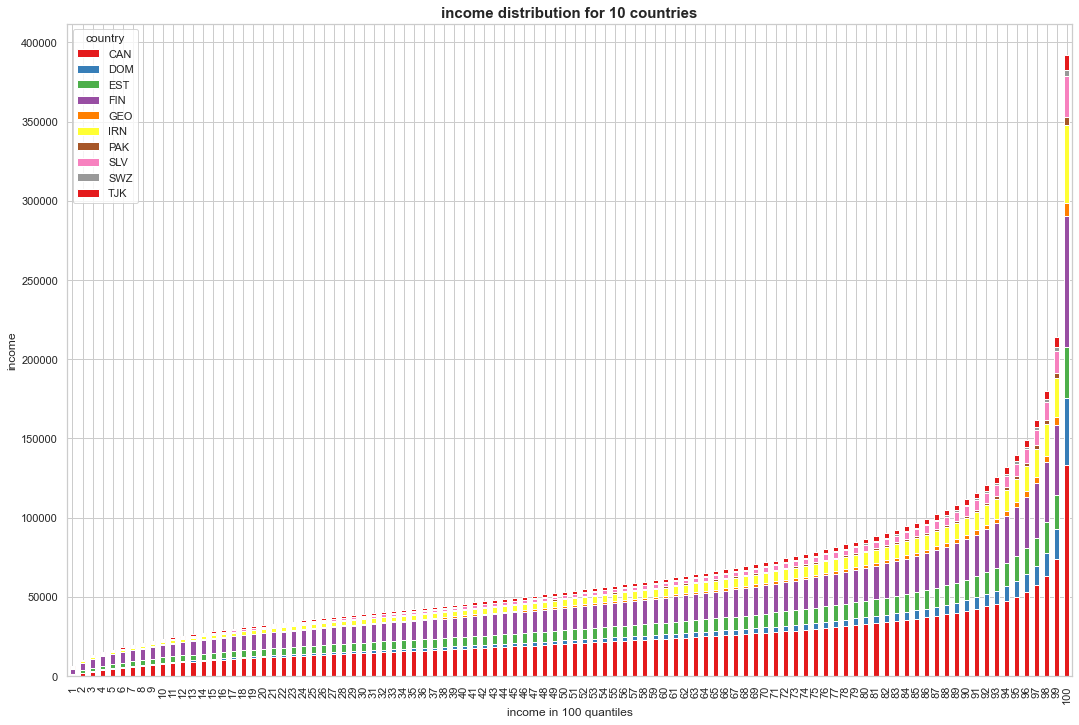

<Figure size 432x288 with 0 Axes>

In [194]:
#set seaborn plotting aesthetics
sns.set(style='whitegrid', palette='Set1')

pvt.plot(kind='bar', stacked=True, figsize= (18,12))
plt.xlabel('income in 100 quantiles', fontsize=12);
plt.ylabel('income', fontsize=12); 
plt.title("income distribution for 10 countries", fontsize= 15, fontweight='bold')
plt.show()
plt.savefig("M2Q1_income distribution 10 countries.jpg")

## Courbe de Lorenz_10 pays

1. Option1: Courbe de Lorenz pour 10 pays:['SWZ', 'PAK', 'GEO', 'TJK', 'SLV', 'DOM', 'IRN', 'EST', 'FIN', 'CAN'] (pays10['country'].unique() sort by income) 
2. Option2: ['MWI', 'KEN', 'NIC', 'FJI', 'CHN', 'BRA', 'TUR', 'EST', 'FRA','IRL']  (sort by gdpppp) 


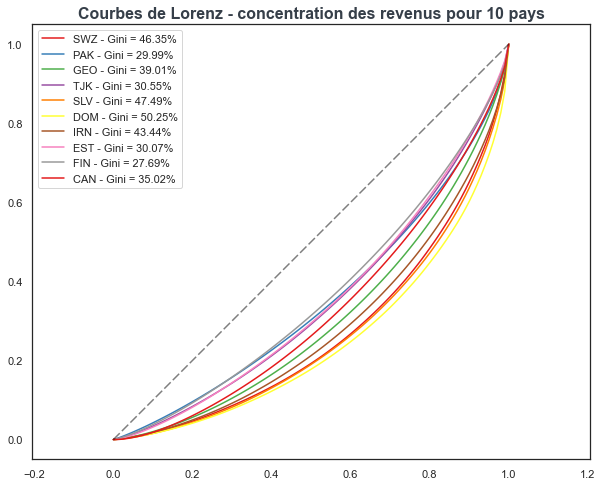

<Figure size 432x288 with 0 Axes>

In [197]:
#sns.lineplot(data=data10, x="quantile", y="income", hue="country")
Selected_Countries=pays10['country'].unique()

sns.set(style='white', palette='Set1')
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('equal')

for countries in Selected_Countries :
    X = data10.loc[data10["country"] == countries,"income"].values
    dep=X
    n=len(dep)
    lorenz=np.cumsum(np.sort(dep))/dep.sum()
    lorenz=np.append([0],lorenz)
    # Calcul de l'indice de Gini
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
    S = 0.5 - AUC 
    gini = 2*S
    xaxis=np.linspace(0,1+1/n,n+1)
    ax.plot(np.linspace(0,1,len(lorenz)),lorenz,label = countries + " - Gini = " + str(round(gini*100,2)) + "%")
    plt.title("Courbe de Lorenz-")   
    

plt.plot(np.arange(0,1.2,0.2),np.arange(0,1.2,0.2), color='black', dashes=[6, 2], alpha=0.5)
plt.legend(loc='upper left')
plt.title("Courbes de Lorenz - concentration des revenus pour 10 pays", 
  color="#363F49", fontweight='bold',fontsize=16)

plt.show()
plt.savefig('Courbes de Lorenz - concentration des revenus pour 10 pays.png')

## Evolution de l'indice de Gini_10 pays

In [199]:
#ginidata = pd.read_xls('WIID_31MAY2021.xlsx', delimiter='.')
ginidata =pd.read_excel('WIID_31MAY2021.xlsx', index_col=0)  
ginidata= ginidata[['country', 'c3', 'year', 'gini']].sort_values('year')
#ginidata.set_index('country', inplace=True)
ginidata.dropna(how='any', inplace=True)
print(ginidata.info())
ginidata.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20592 entries, 18747 to 13200
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  20592 non-null  object 
 1   c3       20592 non-null  object 
 2   year     20592 non-null  int64  
 3   gini     20592 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 804.4+ KB
None


,year,gini
count,20592.000000,20592.000000
mean,2001.319542,37.281548
std,14.517767,9.416913
min,1867.000000,12.100000
25%,1995.000000,30.300000
50%,2005.000000,35.570000
75%,2012.000000,43.462500
max,2020.000000,78.600000


In [174]:
ginidata.reset_index().head()

,id,country,c3,year,gini
0,18747,United Kingdom,GBR,1867,57.5
1,10607,Japan,JPN,1890,31.1
2,10608,Japan,JPN,1900,41.7
3,10609,Japan,JPN,1910,42.0
4,10845,Kenya,KEN,1914,50.0


In [227]:
# datagini pour 10 pays 
ginidata10 = ginidata[ginidata['c3'].isin(['SWZ', 'PAK', 'GEO', 'TJK', 'SLV', 'DOM', 'IRN', 'EST', 'FIN','CAN'])].sort_values('c3')
print(ginidata10.describe())

ginidata1970=ginidata10[ginidata10['year']>=1970]
#ginidata1970=ginidata1970.set_index('country').sort_values('year')
ginidata1970.head()


              year         gini
count  1882.000000  1882.000000
mean   2000.441020    36.324957
std      13.509245     8.444748
min    1951.000000    14.600000
25%    1993.000000    30.400000
50%    2004.000000    35.400000
75%    2011.000000    42.927500
max    2019.000000    63.700000


,country,c3,year,gini
id,,,,
2601,Canada,CAN,1997,30.40
2623,Canada,CAN,1998,44.40
2625,Canada,CAN,1998,44.60
2626,Canada,CAN,1998,33.16
2627,Canada,CAN,1998,30.00


In [201]:
ginidata1970_= ginidata10[ginidata10['year']>=1970][['year','c3','gini']].sort_values('year')
data1970groupby= ginidata1970[['country', 'gini']].groupby('country').mean()

In [202]:
data1970groupby.index
#nom des 10 pays 

Index(['Canada', 'Dominican Republic', 'El Salvador', 'Estonia', 'Eswatini',
       'Finland', 'Georgia', 'Iran', 'Pakistan', 'Tajikistan'],
      dtype='object', name='country')

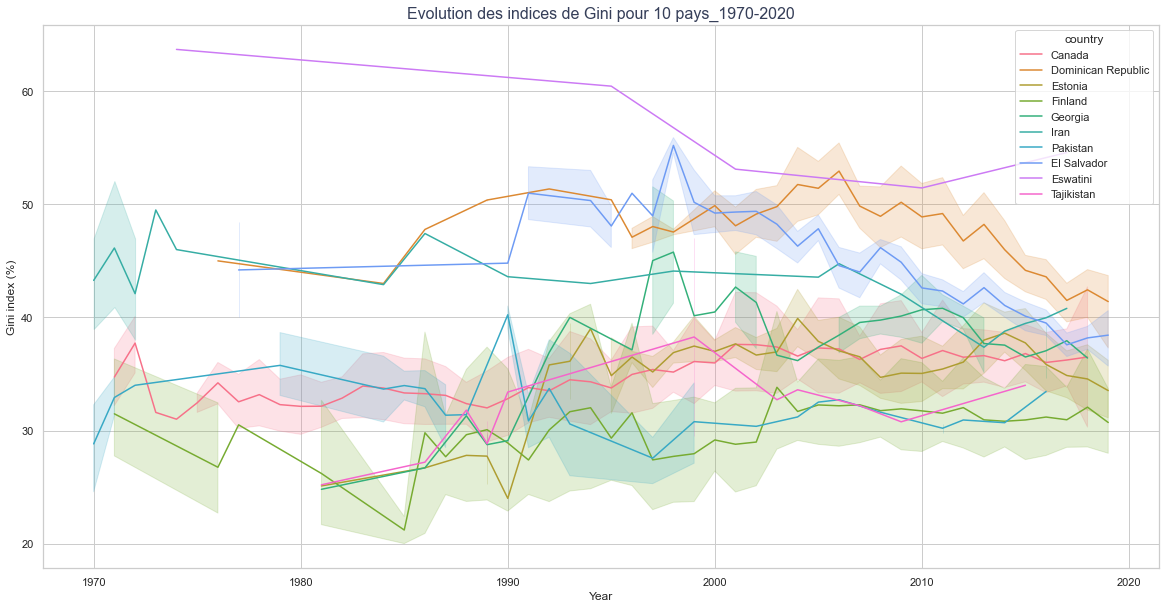

<Figure size 432x288 with 0 Axes>

In [206]:
fig=plt.figure(figsize=(20,10))
#plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', palette='Set1')

sns.lineplot(data=ginidata1970, x="year", y="gini", hue="country")
plt.title("Evolution des indices de Gini pour 10 pays_1970-2020", fontsize=16, color="#363F59")
plt.xlabel("Year")
plt.ylabel("Gini index (%)")
plt.show()
plt.savefig("Evolution des indices de Gini pour 10 pays_1970-2020.png")

In [207]:
print(data.describe())
print(data.info())
print('nb of client countries:', len(data.country.unique()))
print(data.country.unique())
ginidata.head()

        year_survey      quantile  nb_quantiles         income        gdpppp
count  11600.000000  11600.000000       11600.0   11600.000000  11600.000000
mean    2007.982759     50.500000         100.0    6069.121925  12409.323437
std        0.909593     28.867314           0.0    9413.786596  13108.901817
min     2004.000000      1.000000         100.0      16.719418    303.193050
25%     2008.000000     25.750000         100.0     900.768507   2577.500000
50%     2008.000000     50.500000         100.0    2403.492950   7488.500000
75%     2008.000000     75.250000         100.0    7515.313700  17679.250000
max     2011.000000    100.000000         100.0  176928.550000  73127.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 no

,country,c3,year,gini
id,,,,
18747,United Kingdom,GBR,1867,57.5
10607,Japan,JPN,1890,31.1
10608,Japan,JPN,1900,41.7
10609,Japan,JPN,1910,42.0
10845,Kenya,KEN,1914,50.0


In [208]:
#M2 Q4

ginidata2008= ginidata[ginidata['year']==2008].groupby('country').agg({'gini':['mean']})
print(ginidata2008.info())
ginidata2008.reset_index(inplace=True, level=0)
ginidata2008
ginidata2008['country']
ginidata2008.columns     #columns have multi-index , need to drop a index level for columns

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, Afghanistan to West Bank and Gaza
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (gini, mean)  94 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB
None


MultiIndex([('country',     ''),
            (   'gini', 'mean')],
           )

In [226]:
# Drops second level (lower level)
ginidata2008.columns = ginidata2008.columns.droplevel(1)
ginidata2008=ginidata2008.sort_values('gini')

ginidata2008.to_csv('ginidata2008.csv')
ginidata2008.head()

,country,gini
86,Ukraine,26.640000
6,Belarus,27.830000
77,Slovenia,28.451739
76,Slovakia,28.534583
44,Kazakhstan,28.650000


In [210]:
print("les 5 pays ayant l'indice de Gini le plus faible:", ginidata2008[:5]) 
print('                ')
print("les 5 pays ayant l'indice de Gini le plus élevé:", ginidata2008[-5:])

les 5 pays ayant l'indice de Gini le plus faible:        country       gini
86     Ukraine  26.640000
6      Belarus  27.830000
77    Slovenia  28.451739
76    Slovakia  28.534583
44  Kazakhstan  28.650000
                
les 5 pays ayant l'indice de Gini le plus élevé:                      country       gini
16                  Colombia  53.626667
9                     Brazil  53.968889
35                  Honduras  54.836667
14  Central African Republic  56.240000
78              South Africa  68.166923


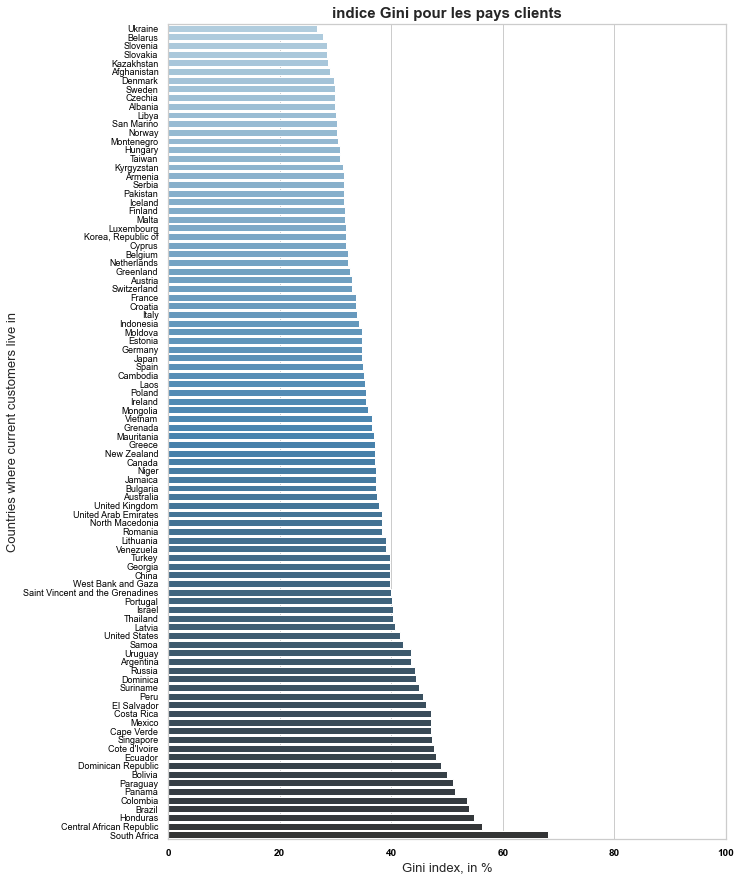

<Figure size 432x288 with 0 Axes>

In [211]:
fig, ax = plt.subplots(figsize=[10,15])   
sns.set_theme(style="whitegrid")

ax= sns.barplot(data=ginidata2008, y="country", x="gini", ci='sd', palette='Blues_d')

plt.title("indice Gini pour les pays clients", fontsize= 15, fontweight= "bold")
plt.xlabel('Gini index, in %', fontsize=13)
plt.ylabel('Countries where current customers live in', fontsize=13)
plt.xticks(color='black',fontsize=10, fontweight='bold')
plt.yticks( color='black', fontsize=9)
plt.xlim([0,100])
plt.show()
plt.savefig("indice Gini pour les pays clients.png")

/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


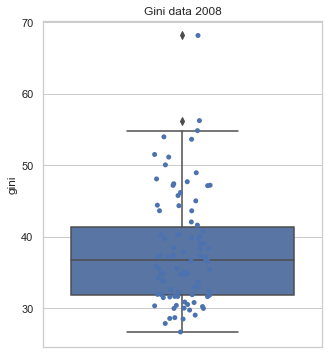

<Figure size 432x288 with 0 Axes>

In [212]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5,6))
ax = sns.boxplot( y="gini", orient="h", data=ginidata2008)
ax = sns.stripplot( y="gini", orient="h", data=ginidata2008)
plt.title('Gini data 2008')
plt.show()
plt.savefig('M2_ginidata2008_boxplot.png')

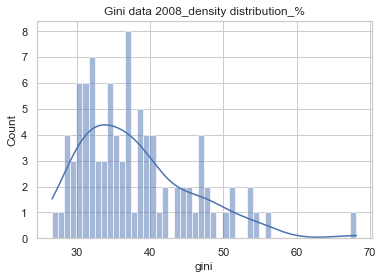

<Figure size 432x288 with 0 Axes>

In [213]:
sns.set(style="whitegrid")
sns.histplot(data=ginidata2008, x='gini', bins = 50, kde = True)
plt.title('Gini data 2008_density distribution_%')
plt.show()
plt.savefig('M2_ginidata_histogram.png')

# NOT a normal distribution

In [214]:
ginidata2008['gini'].describe()

count    94.000000
mean     37.982990
std       7.662844
min      26.640000
25%      31.860625
50%      36.722500
75%      41.399449
max      68.166923
Name: gini, dtype: float64

In [224]:
ginidata2008.loc[ginidata2008['country']=='France']

,country,gini
29,France,33.669167


Selon boxplot et histogramme, les indices Gini des pays clients se répartissent majoritairement entre 30% et 40%, avec médiane 36.7%.

indice Gini de France = 33.66%, entre 1er (25%) et 2nd (50%, médiane) quantile des indices Gini pour ces pays clients, et il est moins que la moyenne (37.98%) 

=> La France se classe en 29/115 parmi les 115 pays clients, et sa distribution de richesse est relativement égalitaire. 

In [1]:
# M1M2 fin